# IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

# READ RESULTS DATA

In [2]:
result_path = './results/fixed_users'
if os.path.exists(result_path) == False:
    exit(0)
num_of_scenarios = len(os.listdir(result_path))

GD_results = [0 for i in range(num_of_scenarios)]
PSO_results = [0 for i in range(num_of_scenarios)]
GA_results = [0 for i in range(num_of_scenarios)]
PSO_GD_results = [0 for i in range(num_of_scenarios)]
GA_GD_results = [0 for i in range(num_of_scenarios)]

num_of_run = [0 for i in range(num_of_scenarios)]
for scenario in os.listdir(result_path):
    path = result_path + '/' + scenario
    for run in os.listdir(path):
        num_of_eaves = int(scenario.split('_')[1][0])
        if (num_of_eaves > 10):
            continue
        i = num_of_eaves - 1
        
        gd = np.load(path + '/' + run + '/' + 'GD_results.npy')
        pso = np.load(path + '/' + run + '/' + 'PSO_results.npy')
        ga = np.load(path + '/' + run + '/' + 'GA_results.npy')
        pso_gd = np.load(path + '/' + run + '/' + 'PSO_GD_results.npy')
        GD_results[i] += gd[-1]
        PSO_results[i] += pso[-1]
        GA_results[i] += ga[-1]
        PSO_GD_results[i] += pso_gd[-1]
        num_of_run[i] += 1
    

print('GD:', GD_results)
print('PSO:', PSO_results)
print('GA:', GA_results)
print('PSO_GD:', PSO_GD_results)
print('num_of_run:', num_of_run)
for i in range(num_of_scenarios):
    GD_results[i] /= num_of_run[i]
    PSO_results[i] /= num_of_run[i]
    GA_results[i] /= num_of_run[i]
    PSO_GD_results[i] /= num_of_run[i]
    #GA_GD_results[i] /= num_of_run[i]

'''
GD_results = GD_results[1:]
PSO_results = PSO_results[1:]
GA_results = GA_results[1:]
PSO_GD_results = PSO_GD_results[1:]
#GA_GD_results = GA_GD_results[1:]
'''


GD: [np.float64(20.541907336024583), np.float64(12.824475091284675), np.float64(13.91007804010532), np.float64(9.28714663643317)]
PSO: [np.float64(21.115656770710846), np.float64(17.842483369550067), np.float64(21.19289560257101), np.float64(22.664765917434895)]
GA: [np.float64(20.51754901885424), np.float64(22.19567872375312), np.float64(17.830138738509547), np.float64(24.826551726598105)]
PSO_GD: [np.float64(45.54917378032825), np.float64(53.86526875231913), np.float64(33.3178637934558), np.float64(77.06465331480818)]
num_of_run: [1, 1, 1, 1]


'\nGD_results = GD_results[1:]\nPSO_results = PSO_results[1:]\nGA_results = GA_results[1:]\nPSO_GD_results = PSO_GD_results[1:]\n#GA_GD_results = GA_GD_results[1:]\n'

# PLOT

[np.float64(45.54917378032825), np.float64(53.86526875231913), np.float64(33.3178637934558), np.float64(77.06465331480818)]


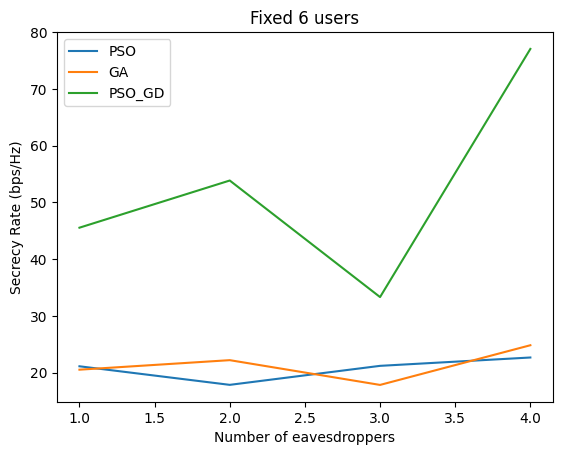

77.06465331480818


In [3]:
plt.xlabel('Number of eavesdroppers')
plt.ylabel('Secrecy Rate (bps/Hz)')
plt.yscale
plt.title('Fixed 6 users')
#plt.plot([i for i in range(4, 11)], GD_results, label='GD')
plt.plot([i for i in range(1, 5)], PSO_results, label='PSO')
plt.plot([i for i in range(1, 5)], GA_results, label='GA')
plt.plot([i for i in range(1, 5)], PSO_GD_results, label='PSO_GD')
print(PSO_GD_results)
#plt.plot(GA_GD_results, label='GA_GD')
plt.legend()
plt.show()
print(PSO_GD_results[-1])